# Understanding Compound Interest

Interest is defined as the cost of borrowing money. It can also be the rate paid for money on deposit. Interest can be calculated in two ways: __simple interest__ or __compound interest__.

- Simple interest is calculated on the principal amount of a loan.
- Compound interest is calculated on the principal amount and the accumulated interest of previous periods.

There can be a significant difference in the amount of interest when it is calculated on a compound basis rather than on a simple basis. In this kernel, we will primarily focus on compounding interest and examine __the investment period, different interest rate levels, and the frequcency of compounding__ to see how these factors affect the total amount.

Becoming thoroughly familiar with these concepts helps you make more informed decisions when taking out a loan or investing!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. How Much Does the Period Affect the Total Amount: Simple vs. Compound Interest?

In [2]:
interest_rate = 0.06
years = range(1,31)

simple_rates = np.array([1+ interest_rate*year for year in years])
compound_rates = np.array([(1 + interest_rate)**year for year in range(1,31)])
time_effect = compound_rates / simple_rates

In [3]:
df = pd.DataFrame({
    'year': [f"Year {year}" for year in years],
    'simple_rates': simple_rates,
    'compoind_rates': np.round(compound_rates,2),
    'time_effect': np.round(time_effect,2)
})

df

,year,simple_rates,compoind_rates,time_effect
0,Year 1,1.06,1.06,1.00
1,Year 2,1.12,1.12,1.00
2,Year 3,1.18,1.19,1.01
3,Year 4,1.24,1.26,1.02
4,Year 5,1.30,1.34,1.03
5,Year 6,1.36,1.42,1.04
6,Year 7,1.42,1.50,1.06
7,Year 8,1.48,1.59,1.08
8,Year 9,1.54,1.69,1.10
9,Year 10,1.60,1.79,1.12


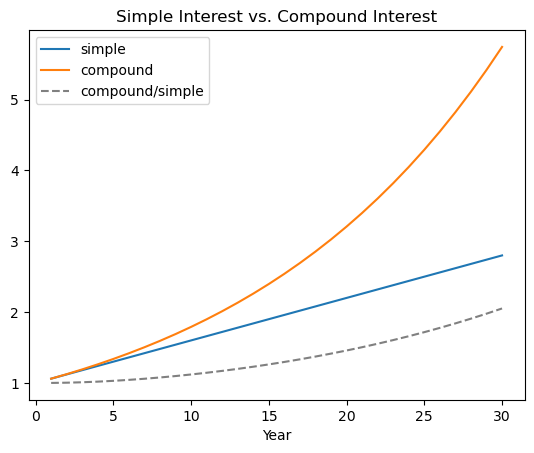

In [98]:
plt.plot(years, simple_rates, label='simple')
plt.plot(years, compound_rates, label='compound')
plt.plot(years, time_effect, label='compound/simple', linestyle='--', c='gray')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.title('Simple Interest vs. Compound Interest');

The table and chart above show that, __all else being equal, the LONGER the investment period, the greater the compounding effect__. The examples below illustrate this further.

In [100]:
def total_amount_calculator_simple(principal, interest_rate, period):
    total_amount = principal * (1 + interest_rate * period)
    return total_amount

def total_amount_calculator_compound(principal, interest_rate, period):
    total_amount = principal * (1 + interest_rate)**period
    return total_amount

### Principal: $1 Million / Interest Rate: 6% / Period: 5 Years

In [96]:
principal = 1000000 
interest_rate = 0.06 
period = 5 # only variable, all else (principal, interest_rate) being equal

simple = total_amount_calculator_simple(principal, interest_rate, period)
compound = total_amount_calculator_compound(principal, interest_rate, period)

compound - simple

38225.57760000019

### Principal: $1 Million / Interest Rate: 6% / Period: 10 Years

In [95]:
principal = 1000000
interest_rate = 0.06
period = 10 # only variable, all else (principal, interest_rate) being equal

simple = total_amount_calculator_simple(principal, interest_rate, period)
compound = total_amount_calculator_compound(principal, interest_rate, period)

compound - simple

190847.69654285465

### Principal: $1 Million / Interest Rate: 6% / Period: 15 Years

In [99]:
principal = 1000000
interest_rate = 0.06
period = 15 # only variable, all else (principal, interest_rate) being equal

simple = total_amount_calculator_simple(principal, interest_rate, period)
compound = total_amount_calculator_compound(principal, interest_rate, period)

compound - simple

496558.19309969153

As the investment period increases, the difference between compound interest and simple interest becomes greater.

## 2. How Much Does the Interest Rate Affect the Total Amount?

In [111]:
rates = [0.04, 0.05, 0.06, 0.07, 0.08]
years = np.arange(1, 31)

interest = {f"interest_{str(int(rate*100)).zfill(3)}": (1 + rate) ** years for rate in rates}

In [115]:
df = pd.DataFrame(interest)
df

,interest_004,interest_005,interest_006,interest_007,interest_008
0,1.040000,1.050000,1.060000,1.070000,1.080000
1,1.081600,1.102500,1.123600,1.144900,1.166400
2,1.124864,1.157625,1.191016,1.225043,1.259712
3,1.169859,1.215506,1.262477,1.310796,1.360489
4,1.216653,1.276282,1.338226,1.402552,1.469328
5,1.265319,1.340096,1.418519,1.500730,1.586874
6,1.315932,1.407100,1.503630,1.605781,1.713824
7,1.368569,1.477455,1.593848,1.718186,1.850930
8,1.423312,1.551328,1.689479,1.838459,1.999005
9,1.480244,1.628895,1.790848,1.967151,2.158925


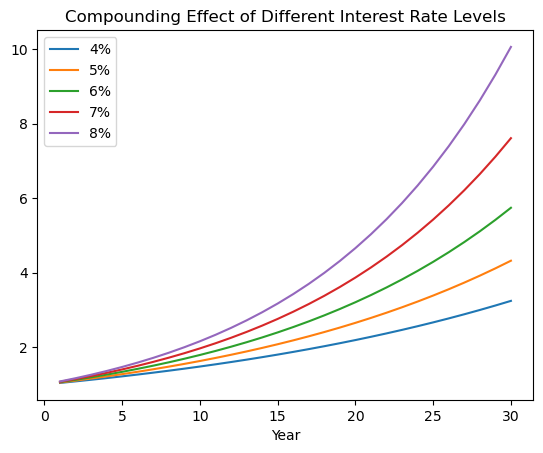

In [118]:
plt.plot(years, df.interest_004, label='4%')
plt.plot(years, df.interest_005, label='5%')
plt.plot(years, df.interest_006, label='6%')
plt.plot(years, df.interest_007, label='7%')
plt.plot(years, df.interest_008, label='8%')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.title('Compounding Effect of Different Interest Rate Levels');

The chart shows that __the HIGHER the interest rate, the greater the compounding effect__.

## 3. How Much Does the Frequency of Compounding Affect the Total Amount?

In [137]:
interest_rate = 0.12
years = np.arange(1, 31)

monthly = np.array([(1 + interest_rate/12)**(year*12) for year in range(1,31)])
quarterly = np.array([(1 + interest_rate/3)**(year*3) for year in range(1,31)])
annually = np.array([(1 + interest_rate)**year for year in range(1,31)])

In [138]:
df = pd.DataFrame({
    'year': [f"Year {year}" for year in years],
    'monthly': np.round(monthly,4),
    'quarterly': np.round(quarterly,4),
    'annually': np.round(annually,4)
})

df

,year,monthly,quarterly,annually
0,Year 1,1.1268,1.1249,1.1200
1,Year 2,1.2697,1.2653,1.2544
2,Year 3,1.4308,1.4233,1.4049
3,Year 4,1.6122,1.6010,1.5735
4,Year 5,1.8167,1.8009,1.7623
5,Year 6,2.0471,2.0258,1.9738
6,Year 7,2.3067,2.2788,2.2107
7,Year 8,2.5993,2.5633,2.4760
8,Year 9,2.9289,2.8834,2.7731
9,Year 10,3.3004,3.2434,3.1058


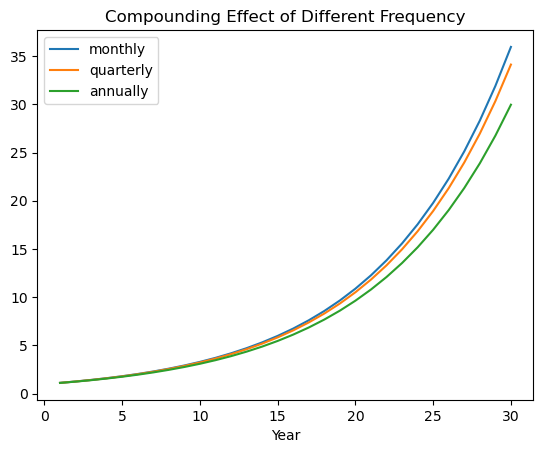

In [142]:
plt.plot(years, df.monthly, label='monthly')
plt.plot(years, df.quarterly, label='quarterly')
plt.plot(years, df.annually, label='annually')
plt.xlabel('Year')
plt.ylabel('')
plt.legend()
plt.title('Compounding Effect of Different Frequency');

The table and chart above show that, __all else being equal, the more FREQUENTLY interest is compounded, the greater the compounding effect__.

## Summary

In short, the three most important principles of compound interest are:
1. All else being equal, the __longer__ the investment period, the greater the compounding effect.
2. The __higher__ the interest rate, the greater the compounding effect.
3. All else being equal, the more __frequently__ interest is compounded, the greater the compounding effect.